<a href="https://colab.research.google.com/github/hbenedek/epfl-stochastic/blob/main/PS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Calculus - Problem Set 12

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

## Exercise 3 

Consider the setup presented in the importance sampling section of the lecture sliedes: $L:= W_1$ denotes the annual loss of a portfolio. Let $p=0.001$ and let $q= 3.0902$ be the $(1-p)$-quantile of $L$. Compute the expected shortfall $ES = \frac{1}{p} \mathbb{E}_{\mathbb{P}}[L \mathbb{1}_{L\ge q}]$ in the following ways. 

In [108]:
# confidence interval

def mean_confidence_interval(data, confidence=0.95):
    ci = scipy.stats.t.interval(confidence, len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data))
    return [np.mean(data), ci[0], ci[1]]

In [109]:
def filter_column(data, i): # i is the desired column
  col = []
  for j in range(len(data)):
    col.append(data[j][i])
  return col

In [110]:
def visualize_simualtion(data, M):
  fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))
  fig.suptitle('Visualizations of the result')
  bins = 30
  axs[0,0].hist(data[0], bins=bins, color='tab:orange')
  axs[0,0].set_title(f'M={M[0]}')
  axs[0,1].hist(data[1], bins=bins, color='tab:green')
  axs[0,1].set_title(f'M={M[1]}')
  axs[1,0].hist(data[2], bins=bins, color='tab:red')
  axs[1,0].set_title(f'M={M[2]}')
  axs[1,1].hist(data[3], bins=bins, color='tab:blue')
  axs[1,1].set_title(f'M={M[3]}')

  for ax in axs.flat:
    ax.set(xlabel='values', ylabel='count')

  for ax in axs.flat:
    ax.label_outer()

In [111]:
p = 0.001
q = 3.0902
M_list = [1000* 2**(2*2), 1000* 2**(2*3), 1000* 2**(2*4), 1000* 2**(2*5)]

(i) analytically exact

Let $L\sim \mathcal{N}(0,1)$ then we have $\frac{1}{p}\mathbb{E}[{\mathbb{1}_{\{L \geq q\}}L]}=\frac{1}{p}\int_q^{\infty}xf_L(x)dx=\frac{1}{p}\left[-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}\right]_q^{\infty}=\frac{1}{p}\frac{e^{-\frac{q^2}{2}}}{\sqrt{2\pi}}$

In [112]:
 result_an = (np.exp(- (q**2 / 2)) / np.sqrt(2 * np.pi)) *(1/p)
 print(result_an)
 results_an = np.ones(4)*result_an

3.3674262406876405


(ii) via Monte Carlo Simulation under $\mathbb{P}$

In [113]:
# defining monte carlo method
def monte_carlo(M, q, p):
  # simulate L
  mu, sigma = 0, 1 
  L = np.random.normal(mu, sigma, M)

  # estimate ES
  sum = (L[L>=q]).sum()

  p_hat = (1/M) * sum
  return (1/p) * p_hat

# making the simulations
sim_mc = []
results_mc = []
for M in M_list:
  ps = []
  for i in tqdm(range(100)):
    p_mc = monte_carlo(M, q, p)
    ps.append(p_mc)
  sim_mc.append(ps)
  results_mc.append(mean_confidence_interval(ps))
  
print(results_mc)

100%|██████████| 100/100 [00:05<00:00, 19.83it/s]

[[3.487919827877174, 3.3276789076254603, 3.648160748128888], [3.3384005549558395, 3.2578947081309884, 3.4189064017806907], [3.363673301406704, 3.320822264543754, 3.4065243382696537], [3.3522086237519657, 3.3309992336842207, 3.3734180138197107]]


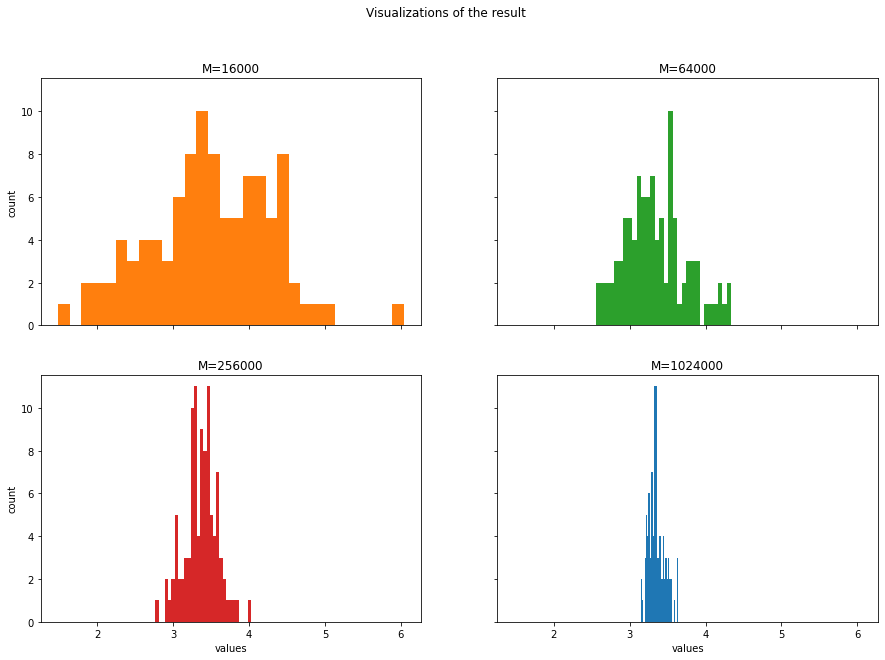

In [114]:
visualize_simualtion(sim_mc, M_list)

(iii) via importance sampling

1. Simulate $M$ independent copies $L^{(1)},..., L^{(M)}$ of $N(q,1)$.
2. Estimate $p' = \frac{1}{M}\sum_{j=1}^M L^{(j)} e^{-qL^{(j)}+\frac{1}{2}q^2}1_{L^{(j)}\ge q}$

In [115]:
# defining importance sampling
def importance_sampling(M, q, p):
  mu, sigma = q, 1 # mean and standard deviation
  L = np.random.normal(mu, sigma, M)

  L2 = L *  np.exp( ((-q)*L) + ((1/2) * pow(q, 2)))
  sum = (L2[L>=q]).sum() 

  p_IS = (1/M) * sum 
  return  (1/p) * p_IS 


# doing the simulation
results_IS = []
sam_IS = []
for M in M_list:
  ps = []
  for i in tqdm(range(100)):
    p_IS =  importance_sampling(M, q, p)
    ps.append(p_IS)
  sam_IS.append(ps)
  results_IS.append(mean_confidence_interval(ps))
  
print(results_IS)

100%|██████████| 100/100 [00:08<00:00, 12.11it/s]

[[3.3662169472929886, 3.3566591272842055, 3.3757747673017717], [3.368327479324536, 3.3632292899416276, 3.373425668707444], [3.3676804423642284, 3.3651184358893462, 3.3702424488391105], [3.367956955858927, 3.3668132068796024, 3.3691007048382517]]


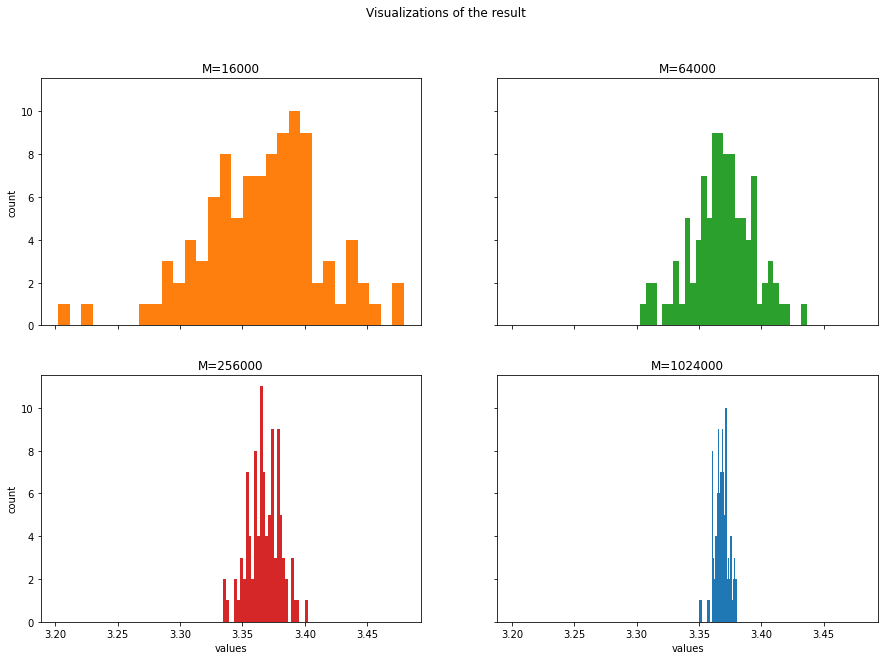

In [116]:
visualize_simualtion(sam_IS, M_list)

Produce a plot similar to Fig 12 in the lecture notes.

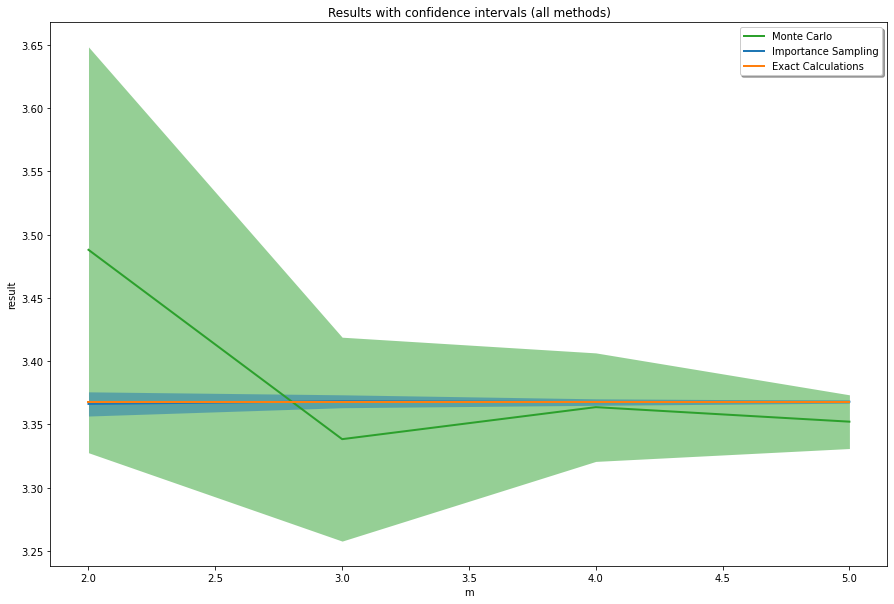

In [117]:
# plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Results with confidence intervals (all methods)')
x =[2,3,4,5]

ax.fill_between(x, filter_column(results_mc, 1), filter_column(results_mc, 2), alpha=.5, linewidth=0, color='tab:green')
ax.plot(x, filter_column(results_mc, 0), linewidth=2, label='Monte Carlo', color='tab:green')

ax.fill_between(x, filter_column(results_IS, 1), filter_column(results_IS, 2), alpha=.5, linewidth=0,  color='tab:blue')
ax.plot(x, filter_column(results_IS, 0), linewidth=2, label='Importance Sampling', color='tab:blue')

ax.plot(x, results_an, linewidth=2, label='Exact Calculations',  color='tab:orange')

ax.set_xlabel('m')
ax.set_ylabel('result')
ax.legend(shadow=True, fancybox=True)

plt.show()

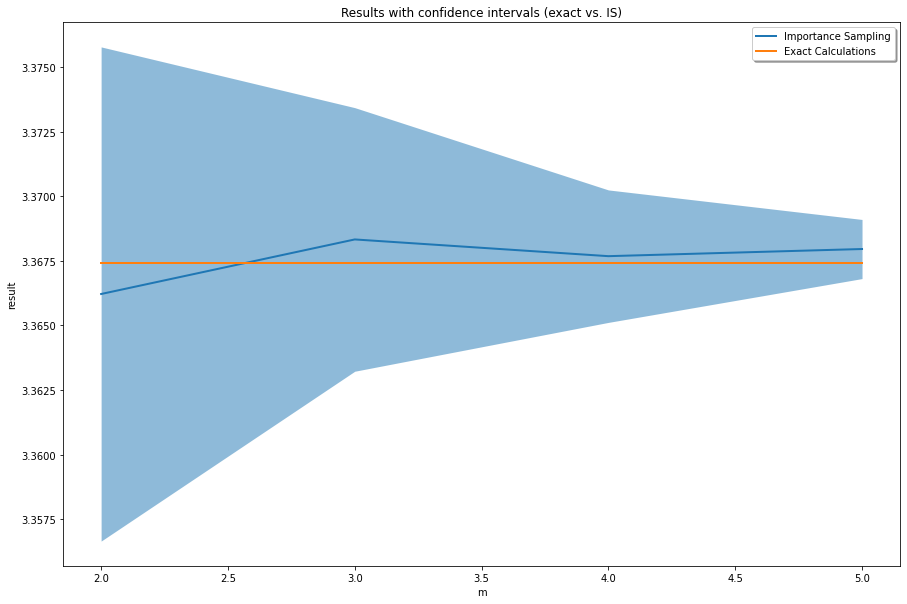

In [118]:
# plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Results with confidence intervals (exact vs. IS)')
x =[2,3,4,5]

ax.fill_between(x, filter_column(results_IS, 1), filter_column(results_IS, 2), alpha=.5, linewidth=0, color='tab:blue')
ax.plot(x, filter_column(results_IS, 0), linewidth=2, label='Importance Sampling', color='tab:blue')

ax.plot(x, results_an, linewidth=2, label='Exact Calculations', color='tab:orange')

ax.set_xlabel('m')
ax.set_ylabel('result')
ax.legend(shadow=True, fancybox=True)

plt.show()

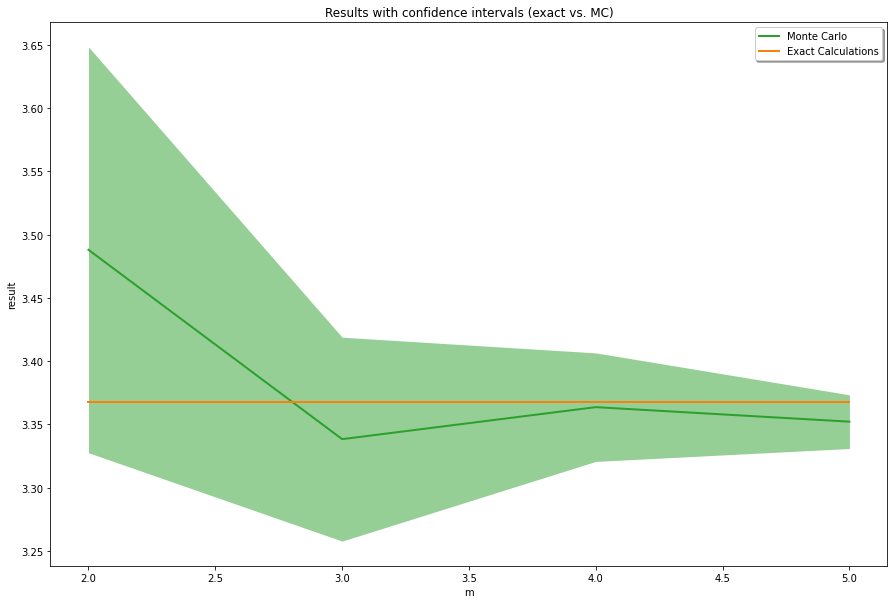

In [119]:
# plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Results with confidence intervals (exact vs. MC)')
x =[2,3,4,5]

ax.fill_between(x, filter_column(results_mc, 1), filter_column(results_mc, 2), alpha=.5, linewidth=0, color='tab:green')
ax.plot(x, filter_column(results_mc, 0), linewidth=2, label='Monte Carlo', color='tab:green')

ax.plot(x, results_an, linewidth=2, label='Exact Calculations', color='tab:orange')

ax.set_xlabel('m')
ax.set_ylabel('result')
ax.legend(shadow=True, fancybox=True)

plt.show()